# Read Data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
A  = pd.read_csv("E:/Data Science/Housing/training_set.csv")

In [2]:
A.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# Missing Data treatment

In [3]:
A.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
A.shape

(1460, 81)

In [5]:
from ml_functions import Missing_data
md = Missing_data()
md.replacer(A)

In [6]:
A.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

# Findind deleting unique columns in the data

In [7]:
for i in A.columns:
    print("\n",A[i].value_counts())


 1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64

 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

 70.05     259
60.00     143
70.00      70
80.00      69
50.00      57
         ... 
111.00      1
138.00      1
128.00      1
33.00       1
168.00      1
Name: LotFrontage, Length: 111, dtype: int64

 7200     25
9600     24
6000     17
8400     14
9000     14
         ..
13031     1
10991     1
8944      1
6897      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

 Pave    1454
Grvl       6
Name: Street, dtype: int64

 Grvl    1419
Pave      41
Name: Alley, dtype: int64

 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotS

In [8]:
A = A.drop(labels="Id",axis=1)

In [9]:
A.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


# Declare X and Y variable

In [10]:
X = A.drop(labels=["SalePrice"],axis=1)
Y = A[["SalePrice"]]

# EDA (Exploratory Data Analysis)

In [11]:
cat, con = md.catconsep(X)

# a) Univariant Analysis

In [12]:
def univariate(df,cat,con):
        from warnings import filterwarnings
        filterwarnings("ignore")
        import seaborn as sb
        import matplotlib.pyplot as plt
        plt.figure(figsize=(20,120))
        x = 1
        u = int(df.shape[1]/3)+1
        for i in df.columns:
            if(df[i].dtypes == "object"):
                plt.subplot(u,3,x)
                sb.countplot(df[i])
                x = x + 1
            else:
                plt.subplot(u,3,x)
                sb.distplot(df[i])
                x = x + 1
                
        plt.show()

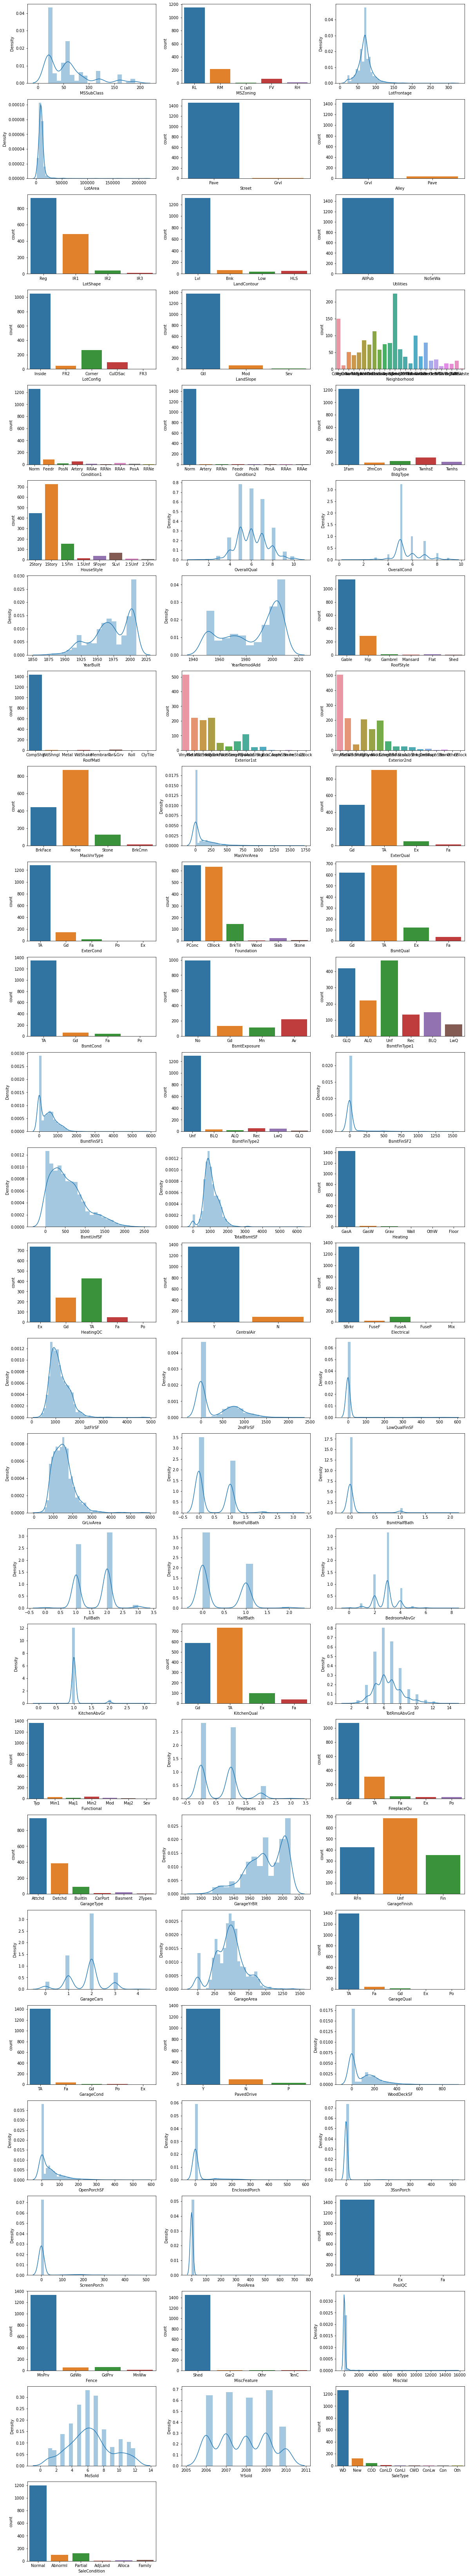

In [13]:
univariate(X,cat,con)

In [14]:
def bivariate_ycon(df,y_df,cat,con):
        from warnings import filterwarnings
        filterwarnings("ignore")
        import seaborn as sb
        import matplotlib.pyplot as plt
        plt.figure(figsize=(20,120))
        x = 1
        u = int(df.shape[1]/3)+1
        y_col = y_df.columns
        y_fin = y_col[0]
        for i in df.columns:
            if(df[i].dtypes == "object"):
                plt.subplot(u,3,x)
                sb.boxplot(df[i],y_df[y_fin])
                x = x + 1
            else:
                plt.subplot(u,3,x)
                sb.scatterplot(df[i],y_df[y_fin])
                x = x + 1
                
        plt.show()

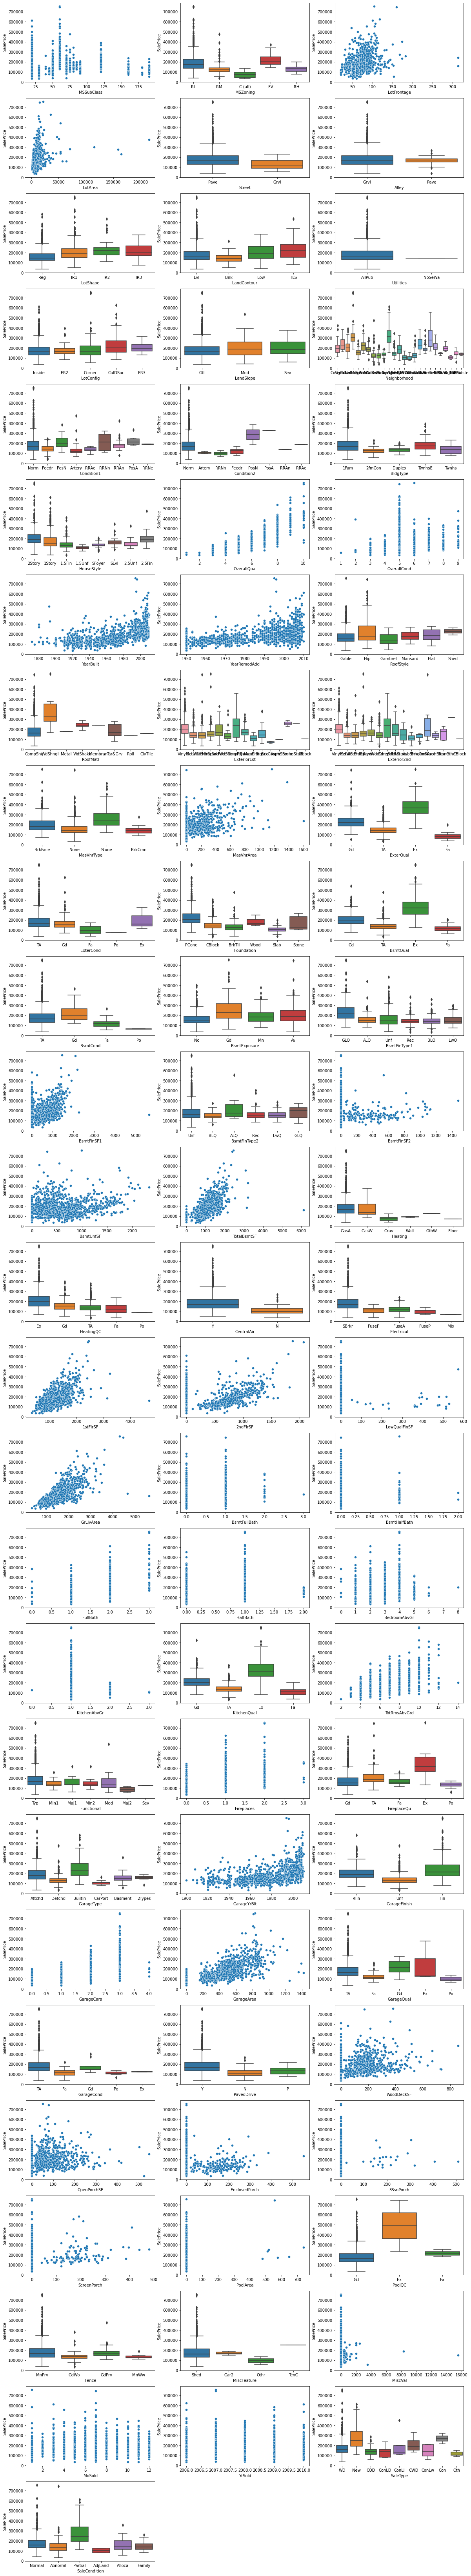

In [15]:
bivariate_ycon(X,Y,cat,con)

# Removing skew of data

In [16]:
X[con].skew()

MSSubClass        1.407657
LotFrontage       2.384949
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676411
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668201
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
dtype: float64

In [17]:
from numpy import sqrt,log
A["MSSubClass"] = log(A["MSSubClass"])
A["LotFrontage"] = log(A["LotFrontage"])
A["LotArea"] = log(A["LotArea"])
A["MasVnrArea"] = sqrt(A["MasVnrArea"])
A["BsmtFinSF1"] = sqrt(A["BsmtFinSF1"])
A["TotalBsmtSF"] = sqrt(A["TotalBsmtSF"])
A["1stFlrSF"] = log(A["1stFlrSF"])
A["LowQualFinSF"] = sqrt(A["LowQualFinSF"])
A["GrLivArea"] = log(A["GrLivArea"])
A["BsmtHalfBath"] = sqrt(A["BsmtHalfBath"])
A["KitchenAbvGr"] = sqrt(A["KitchenAbvGr"])
A["WoodDeckSF"] = sqrt(A["WoodDeckSF"])
A["OpenPorchSF"] = sqrt(A["OpenPorchSF"])
A["EnclosedPorch"] = sqrt(A["EnclosedPorch"])
A["3SsnPorch"] = sqrt(A["3SsnPorch"])
A["ScreenPorch"] = sqrt(A["ScreenPorch"])
A["PoolArea"] = sqrt(A["PoolArea"])
A["MiscVal"] = sqrt(A["MiscVal"])

In [18]:
A[con].skew()

MSSubClass        0.232511
LotFrontage      -0.930796
LotArea          -0.137994
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        1.033300
BsmtFinSF1       -0.029946
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF      -1.274537
1stFlrSF          0.079157
2ndFlrSF          0.813030
LowQualFinSF      8.065393
GrLivArea        -0.006995
BsmtFullBath      0.596067
BsmtHalfBath      3.893994
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      3.105498
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668201
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        0.486574
OpenPorchSF       0.600884
EnclosedPorch     2.347775
3SsnPorch         8.277078
ScreenPorch       3.354780
PoolArea         14.464808
MiscVal           9.559130
MoSold            0.212053
YrSold            0.096269
dtype: float64

# Find and Drop cols from X having very minute or no correlation

In [19]:
X.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.323663,0.077106,0.137455,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179187,0.128451,-0.067759,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179187,1.000000,0.263582,-0.072302,...,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706


<AxesSubplot:>

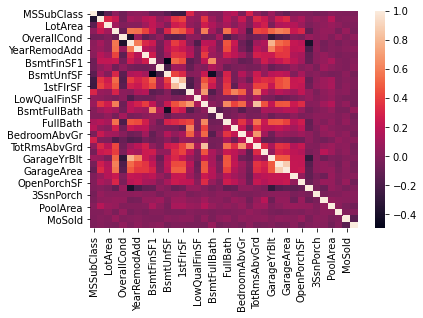

In [20]:
from seaborn import heatmap
heatmap(X.corr())

# Data Preprocessing

In [21]:
X = md.preprocessing(X)

In [22]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0,0,0,1,0,0,0,0,1,0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574411,1.171992,-0.288653,...,0,0,0,1,0,0,0,0,1,0
2,0.073375,-0.093111,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0,0,0,1,0,0,0,0,1,0
3,0.309859,-0.456475,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574411,-0.499274,-0.288653,...,0,0,0,1,1,0,0,0,0,0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0,0,0,1,0,0,0,0,1,0


In [23]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


# Divide data into training and testing set

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=31)

In [25]:
xtrain.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1454,-0.872563,-0.365634,-0.302353,0.651479,-0.517200,1.084115,0.975575,-0.574411,-0.073781,-0.288653,...,0,0,0,1,0,0,0,0,1,0
226,0.073375,0.542777,-0.056809,0.651479,-0.517200,0.786028,0.491040,1.032173,0.266175,-0.288653,...,0,0,0,1,1,0,0,0,0,0
944,-0.872563,0.000002,0.386674,-0.071836,0.381743,-0.439440,-1.301740,2.422699,-0.729566,1.906505,...,0,0,0,0,1,0,0,0,0,0
624,0.073375,0.451936,-0.011709,-0.071836,-0.517200,0.024251,-0.623391,1.021093,-0.431282,-0.288653,...,0,0,0,1,0,0,0,0,1,0
1142,0.073375,0.315674,-0.055305,1.374795,-0.517200,1.150356,1.072482,1.309170,1.549233,-0.288653,...,0,1,0,0,0,0,0,0,0,1


# Backward elemination OLS model

In [26]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
model = OLS(ytrain,xconst)
est = model.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     68.58
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:38:39   Log-Likelihood:                -13096.
No. Observations:                1168   AIC:                         2.667e+04
Df Residuals:                     928   BIC:                         2.789e+04
Df Model:                         239                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3532.1217   3124.883      1.130      0.259   -2600.536    9664.779
MSSubClass            -1470.4842   3760.617     -0.391      0.696   -8850.784    5909.815
LotFrontage            1392.4781    997.981      1.395      0.163    -566.084    3351.040
LotArea                8127.2187   1056.615      7.692      0.000    6053.587    1.02e+04
OverallQual            9744.7023   1426.521      6.831      0.000    6945.120    1.25e+04
OverallCond            6309.8404    996.564      6.332      0.000    4354.060    8265.621
YearBuilt              1.056e+04   2298.118      4.597      0.000    6053.642    1.51e+04
YearRemodAdd           1746.4730   1168.024      1.495      0.135    -545.803    4038.749
MasVnrArea             4275.0022   1061.734      4.026      0.000    2191.324    6358.680
BsmtFinSF1             9067.8864   1012.667      8.954      0.000    7080.503    1.11e+04
BsmtFinSF2             1066.6714   1173.538      0.909      0.364   -1236.425    3369.768
BsmtUnfSF              -665.5002    820.065     -0.812      0.417   -2274.897     943.896
TotalBsmtSF            9149.3254   1232.774      7.422      0.000    6729.977    1.16e+04
1stFlrSF               7343.8115   1565.309      4.692      0.000    4271.855    1.04e+04
2ndFlrSF               1.524e+04   1730.962      8.805      0.000    1.18e+04    1.86e+04
LowQualFinSF           -895.9686    893.327     -1.003      0.316   -2649.144     857.207
GrLivArea              1.798e+04   1296.648     13.867      0.000    1.54e+04    2.05e+04
BsmtFullBath            529.7123   1030.308      0.514      0.607   -1492.292    2551.716
BsmtHalfBath           -433.3228    699.168     -0.620      0.536   -1805.457     938.811
FullBath               1768.8444   1232.165      1.436      0.151    -649.309    4186.998
HalfBath                964.1540   1064.628      0.906      0.365   -1125.204    3053.512
BedroomAbvGr          -4622.3769   1169.063     -3.954      0.000   -6916.691   -2328.063
KitchenAbvGr          -2707.7806   1343.169     -2.016      0.044   -5343.782     -71.780
TotRmsAbvGrd           2868.4972   1600.811      1.792      0.073    -273.132    6010.127
Fireplaces              925.9221    988.278      0.937      0.349   -1013.597    2865.441
GarageYrBlt            1269.5598   1390.173      0.913      0.361   -1458.688    3997.808
GarageCars             3599.1622   1653.671      2.176      0.030     353.794    6844.531
GarageArea              200.2448   1640.967      0.122      0.903   -3020.191    3420.681
WoodDeckSF             1773.8787    762.511      2.326      0.020     277.433    3270.324
OpenPorchSF             979.5240    779.458      1.257      0.209    -550.180    2509.228
EnclosedPorch           162.4532    776.015      0.209      0.834   -1360.495    1685.401
3SsnPorch              

# OLS Backward eleminaaion model function for feature selection 

In [27]:
A = pd.read_csv("E:/Data Science/Housing/training_set.csv")
def OLS_reg(A,ycol,col2remove):
    from ml_functions import Missing_data
    md1 = Missing_data()
    md1.replacer(A)
    
    from pandas import get_dummies
    Y = A[ycol]
    A = A.drop(labels=["Id","SalePrice"],axis=1)
    
    from numpy import sqrt,log
    A["MSSubClass"] = log(A["MSSubClass"])
    A["LotFrontage"] = log(A["LotFrontage"])
    A["LotArea"] = log(A["LotArea"])
    A["MasVnrArea"] = sqrt(A["MasVnrArea"])
    A["BsmtFinSF1"] = sqrt(A["BsmtFinSF1"])
    A["TotalBsmtSF"] = sqrt(A["TotalBsmtSF"])
    A["1stFlrSF"] = log(A["1stFlrSF"])
    A["LowQualFinSF"] = sqrt(A["LowQualFinSF"])
    A["GrLivArea"] = log(A["GrLivArea"])
    A["BsmtHalfBath"] = sqrt(A["BsmtHalfBath"])
    A["KitchenAbvGr"] = sqrt(A["KitchenAbvGr"])
    A["WoodDeckSF"] = sqrt(A["WoodDeckSF"])
    A["OpenPorchSF"] = sqrt(A["OpenPorchSF"])
    A["EnclosedPorch"] = sqrt(A["EnclosedPorch"])
    A["3SsnPorch"] = sqrt(A["3SsnPorch"])
    A["ScreenPorch"] = sqrt(A["ScreenPorch"])
    A["PoolArea"] = sqrt(A["PoolArea"])
    A["MiscVal"] = sqrt(A["MiscVal"])
    
    cat, con = md.catconsep(A)
           
    X = md.preprocessing(A)
    
    X = X.drop(labels=col2remove,axis=1)
    
    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)
    
    from statsmodels.api import OLS,add_constant
    xconst = add_constant(xtrain)
    model = OLS(ytrain,xconst)
    est = model.fit()
    print(est.summary())

In [28]:
OLS_reg(A,["SalePrice"],["Exterior1st_WdShing","Electrical_SBrkr","HeatingQC_Ex","KitchenQual_Fa","Exterior2nd_MetalSd","LotFrontage","Exterior2nd_BrkFace","Functional_Maj2","Fence_MnWw","Exterior1st_VinylSd","BldgType_2fmCon","Electrical_FuseP","ExterCond_Ex","BsmtFinType2_Rec","ExterCond_Fa","RoofStyle_Mansard","Exterior2nd_HdBoard","Exterior2nd_VinylSd","MasVnrType_BrkCmn","Exterior2nd_CmentBd","BsmtFinType2_Unf","GarageArea","Foundation_PConc","TotalBsmtSF","Heating_GasA","Heating_GasW","FireplaceQu_Ex","Electrical_Mix","Electrical_FuseA","2ndFlrSF","HouseStyle_2Story","HouseStyle_1Story","Exterior1st_MetalSd","MiscFeature_Gar2","BsmtFinType1_BLQ","SaleType_Con","Functional_Maj1","Heating_Wall","BsmtFinType2_BLQ","MasVnrType_BrkFace","SaleType_Oth","FireplaceQu_Gd","FireplaceQu_TA","Exterior2nd_CBlock","LotShape_Reg","PavedDrive_P","EnclosedPorch","Exterior2nd_AsbShng","Exterior1st_BrkComm","Exterior1st_AsbShng","Exterior2nd_Brk Cmn","Heating_OthW","HeatingQC_Fa","HouseStyle_1.5Fin","Neighborhood_Veenker","Neighborhood_SawyerW","SaleType_CWD","Neighborhood_SWISU","Foundation_BrkTil","Condition2_Norm","Street_Grvl","HouseStyle_SLvl","BsmtFinType1_Rec","BsmtFinType1_ALQ","Exterior1st_CBlock","ExterCond_Po","Exterior2nd_Wd Sdng","Electrical_FuseF","Exterior1st_ImStucc","LandContour_Low","LotShape_IR2","Functional_Mod","Exterior1st_Stone","1stFlrSF","Neighborhood_OldTown","Exterior1st_AsphShn","BsmtQual_Fa","Neighborhood_IDOTRR","Fence_MnPrv","MiscVal","ExterQual_TA","Condition1_RRNe","Condition1_RRNn","ExterQual_Gd","MiscFeature_Shed","Condition1_Artery","MiscFeature_Othr","Condition2_Artery","3SsnPorch","BsmtCond_TA","Heating_Floor","Fence_GdWo","HeatingQC_Po","LandContour_Bnk","GarageType_CarPort","SaleCondition_Family","GarageType_2Types","BsmtExposure_Mn","Exterior2nd_AsphShn","RoofStyle_Gambrel","HouseStyle_2.5Fin","GarageFinish_RFn","Condition2_RRAn","Alley_Grvl","Exterior2nd_Other","RoofStyle_Gable","RoofStyle_Hip","ExterQual_Fa","BldgType_Twnhs","BldgType_TwnhsE","Condition2_RRNn","Exterior2nd_Stucco","Functional_Min1","OpenPorchSF","RoofStyle_Flat","LandContour_Lvl","LandContour_HLS","Heating_Grav","LotShape_IR3","LotConfig_FR3","LotConfig_FR2","LotShape_IR1","BsmtHalfBath","HouseStyle_SFoyer","BsmtExposure_Av","MoSold","Exterior1st_Plywood","Condition2_Feedr","CentralAir_Y","Utilities_NoSeWa","MSZoning_FV","MSZoning_RH","MSZoning_RL","Exterior1st_Stucco","MSZoning_RM","FireplaceQu_Po","SaleType_ConLI","SaleType_ConLD","Neighborhood_Blueste","Foundation_Wood","SaleType_ConLw","Neighborhood_Sawyer","Neighborhood_CollgCr","Condition2_PosN","Neighborhood_Timber","LandSlope_Gtl","LandSlope_Mod","CentralAir_N","Functional_Sev","ExterCond_TA","YrSold","Functional_Min2","BsmtQual_TA","BsmtFinType2_LwQ","Neighborhood_BrDale","BsmtCond_Fa","YearRemodAdd","BsmtQual_Gd","Neighborhood_ClearCr","KitchenQual_Gd","Exterior1st_CemntBd","KitchenQual_TA","GarageFinish_Fin","SaleCondition_Abnorml","Street_Pave","PavedDrive_Y","Condition1_PosA","PavedDrive_N","BldgType_1Fam","Neighborhood_MeadowV","Neighborhood_NPkVill","MiscFeature_TenC","HouseStyle_2.5Unf","Alley_Pave","PoolQC_Gd","ExterCond_Gd","ScreenPorch","SaleCondition_Alloca","WoodDeckSF","HeatingQC_TA","SaleCondition_AdjLand","SaleCondition_Normal","Foundation_CBlock","BsmtFinType1_LwQ","Exterior1st_HdBoard","GarageCond_Po","SaleType_WD","SaleType_COD","GarageCond_Gd","GarageCond_Fa","GarageCond_TA","Exterior1st_Wd Sdng","BsmtFinType2_GLQ","BsmtFinType2_ALQ","GarageFinish_Unf","RoofStyle_Shed","HeatingQC_Gd","BldgType_Duplex","BsmtCond_Po","Exterior2nd_Wd Shng","Condition1_RRAn","Exterior2nd_Stone","HouseStyle_1.5Unf","Neighborhood_Blmngtn","BsmtCond_Gd","LandSlope_Sev","MasVnrType_Stone","Condition2_RRAe","Condition1_Feedr","Exterior2nd_ImStucc"])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     173.6
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:38:40   Log-Likelihood:                -13303.
No. Observations:                1168   AIC:                         2.676e+04
Df Residuals:                    1091   BIC:                         2.715e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.849e+

# Creating a dataframe of selected columns in the feature selection

In [29]:
A = pd.read_csv("E:/Data Science/Housing/training_set.csv")

md2 = Missing_data()
md2.replacer(A)
    
Y = A["SalePrice"]
A = A.drop(labels=["Id","SalePrice"],axis=1)
    
A["MSSubClass"] = log(A["MSSubClass"])
A["LotFrontage"] = log(A["LotFrontage"])
A["LotArea"] = log(A["LotArea"])
A["MasVnrArea"] = sqrt(A["MasVnrArea"])
A["BsmtFinSF1"] = sqrt(A["BsmtFinSF1"])
A["TotalBsmtSF"] = sqrt(A["TotalBsmtSF"])
A["1stFlrSF"] = log(A["1stFlrSF"])
A["LowQualFinSF"] = sqrt(A["LowQualFinSF"])
A["GrLivArea"] = log(A["GrLivArea"])
A["BsmtHalfBath"] = sqrt(A["BsmtHalfBath"])
A["KitchenAbvGr"] = sqrt(A["KitchenAbvGr"])
A["WoodDeckSF"] = sqrt(A["WoodDeckSF"])
A["OpenPorchSF"] = sqrt(A["OpenPorchSF"])
A["EnclosedPorch"] = sqrt(A["EnclosedPorch"])
A["3SsnPorch"] = sqrt(A["3SsnPorch"])
A["ScreenPorch"] = sqrt(A["ScreenPorch"])
A["PoolArea"] = sqrt(A["PoolArea"])
A["MiscVal"] = sqrt(A["MiscVal"])
    
cat, con = md2.catconsep(A)
           
X = md2.preprocessing(A)
    
X = X.drop(labels=['RoofMatl_ClyTile', 'RoofMatl_Membran','RoofMatl_Metal', 'RoofMatl_Roll','GarageQual_Ex','PoolQC_Fa',"Exterior1st_WdShing","Electrical_SBrkr","HeatingQC_Ex","KitchenQual_Fa","Exterior2nd_MetalSd","LotFrontage","Exterior2nd_BrkFace","Functional_Maj2","Fence_MnWw","Exterior1st_VinylSd","BldgType_2fmCon","Electrical_FuseP","ExterCond_Ex","BsmtFinType2_Rec","ExterCond_Fa","RoofStyle_Mansard","Exterior2nd_HdBoard","Exterior2nd_VinylSd","MasVnrType_BrkCmn","Exterior2nd_CmentBd","BsmtFinType2_Unf","GarageArea","Foundation_PConc","TotalBsmtSF","Heating_GasA","Heating_GasW","FireplaceQu_Ex","Electrical_Mix","Electrical_FuseA","2ndFlrSF","HouseStyle_2Story","HouseStyle_1Story","Exterior1st_MetalSd","MiscFeature_Gar2","BsmtFinType1_BLQ","SaleType_Con","Functional_Maj1","Heating_Wall","BsmtFinType2_BLQ","MasVnrType_BrkFace","SaleType_Oth","FireplaceQu_Gd","FireplaceQu_TA","Exterior2nd_CBlock","LotShape_Reg","PavedDrive_P","EnclosedPorch","Exterior2nd_AsbShng","Exterior1st_BrkComm","Exterior1st_AsbShng","Exterior2nd_Brk Cmn","Heating_OthW","HeatingQC_Fa","HouseStyle_1.5Fin","Neighborhood_Veenker","Neighborhood_SawyerW","SaleType_CWD","Neighborhood_SWISU","Foundation_BrkTil","Condition2_Norm","Street_Grvl","HouseStyle_SLvl","BsmtFinType1_Rec","BsmtFinType1_ALQ","Exterior1st_CBlock","ExterCond_Po","Exterior2nd_Wd Sdng","Electrical_FuseF","Exterior1st_ImStucc","LandContour_Low","LotShape_IR2","Functional_Mod","Exterior1st_Stone","1stFlrSF","Neighborhood_OldTown","Exterior1st_AsphShn","BsmtQual_Fa","Neighborhood_IDOTRR","Fence_MnPrv","MiscVal","ExterQual_TA","Condition1_RRNe","Condition1_RRNn","ExterQual_Gd","MiscFeature_Shed","Condition1_Artery","MiscFeature_Othr","Condition2_Artery","3SsnPorch","BsmtCond_TA","Heating_Floor","Fence_GdWo","HeatingQC_Po","LandContour_Bnk","GarageType_CarPort","SaleCondition_Family","GarageType_2Types","BsmtExposure_Mn","Exterior2nd_AsphShn","RoofStyle_Gambrel","HouseStyle_2.5Fin","GarageFinish_RFn","Condition2_RRAn","Alley_Grvl","Exterior2nd_Other","RoofStyle_Gable","RoofStyle_Hip","ExterQual_Fa","BldgType_Twnhs","BldgType_TwnhsE","Condition2_RRNn","Exterior2nd_Stucco","Functional_Min1","OpenPorchSF","RoofStyle_Flat","LandContour_Lvl","LandContour_HLS","Heating_Grav","LotShape_IR3","LotConfig_FR3","LotConfig_FR2","LotShape_IR1","BsmtHalfBath","HouseStyle_SFoyer","BsmtExposure_Av","MoSold","Exterior1st_Plywood","Condition2_Feedr","CentralAir_Y","Utilities_NoSeWa","MSZoning_FV","MSZoning_RH","MSZoning_RL","Exterior1st_Stucco","MSZoning_RM","FireplaceQu_Po","SaleType_ConLI","SaleType_ConLD","Neighborhood_Blueste","Foundation_Wood","SaleType_ConLw","Neighborhood_Sawyer","Neighborhood_CollgCr","Condition2_PosN","Neighborhood_Timber","LandSlope_Gtl","LandSlope_Mod","CentralAir_N","Functional_Sev","ExterCond_TA","YrSold","Functional_Min2","BsmtQual_TA","BsmtFinType2_LwQ","Neighborhood_BrDale","BsmtCond_Fa","YearRemodAdd","BsmtQual_Gd","Neighborhood_ClearCr","KitchenQual_Gd","Exterior1st_CemntBd","KitchenQual_TA","GarageFinish_Fin","SaleCondition_Abnorml","Street_Pave","PavedDrive_Y","Condition1_PosA","PavedDrive_N","BldgType_1Fam","Neighborhood_MeadowV","Neighborhood_NPkVill","MiscFeature_TenC","HouseStyle_2.5Unf","Alley_Pave","PoolQC_Gd","ExterCond_Gd","ScreenPorch","SaleCondition_Alloca","WoodDeckSF","HeatingQC_TA","SaleCondition_AdjLand","SaleCondition_Normal","Foundation_CBlock","BsmtFinType1_LwQ","Exterior1st_HdBoard","GarageCond_Po","SaleType_WD","SaleType_COD","GarageCond_Gd","GarageCond_Fa","GarageCond_TA","Exterior1st_Wd Sdng","BsmtFinType2_GLQ","BsmtFinType2_ALQ","GarageFinish_Unf","RoofStyle_Shed","HeatingQC_Gd","BldgType_Duplex","BsmtCond_Po","Exterior2nd_Wd Shng","Condition1_RRAn","Exterior2nd_Stone","HouseStyle_1.5Unf","Neighborhood_Blmngtn","BsmtCond_Gd","LandSlope_Sev","MasVnrType_Stone","Condition2_RRAe","Condition1_Feedr","Exterior2nd_ImStucc"],axis=1)
    
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

# 1) Linear Regression Model

In [30]:
from ml_functions import Model_maker
mm = Model_maker()
mlr_model = mm.maker_linear_regressor_model(xtrain,ytrain)

In [31]:
from ml_functions import Model_accuracy_measure
mam = Model_accuracy_measure()
mlr_tr_err,mlr_ts_err = mam.regressor_accuracy(xtrain,ytrain,xtest,ytest,mlr_model)
print(f"Multiple Linear Regression Model- \nTrainning Error: {mlr_tr_err}\nTesting Error: {mlr_ts_err}")

Multiple Linear Regression Model- 
Trainning Error: 15343.1
Testing Error: 19182.78


# Checking colinearity and multicolinearity

In [32]:
X.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageType_Detchd,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,PoolQC_Ex,Fence_GdPrv,SaleType_New,SaleCondition_Partial
MSSubClass,1.000000,-0.376255,0.078694,-0.039268,-0.004099,0.020639,-0.108079,-0.090289,-0.131782,0.074709,...,0.066712,0.004981,0.053996,0.023225,-0.031137,-0.031156,0.021811,0.022696,-0.059408,-0.067047
LotArea,-0.376255,1.000000,0.178215,-0.006305,0.021937,0.101247,0.166792,0.092214,0.077247,0.000701,...,-0.214002,-0.031629,0.022282,0.004605,0.011299,-0.009536,0.056496,0.025263,0.058056,0.061605
OverallQual,0.078694,0.178215,1.000000,-0.091932,0.572323,0.434473,0.143028,-0.059119,0.308159,-0.030930,...,-0.337227,-0.124380,0.043769,-0.025141,0.084056,-0.016055,0.077708,0.030543,0.327412,0.323295
OverallCond,-0.039268,-0.006305,-0.091932,1.000000,-0.375983,-0.151820,0.004996,0.040229,-0.136841,0.027721,...,0.183224,0.053119,0.094425,-0.023469,-0.096061,0.014139,-0.035803,0.093972,-0.156175,-0.151659
YearBuilt,-0.004099,0.021937,0.572323,-0.375983,1.000000,0.386922,0.207231,-0.049107,0.149040,-0.186619,...,-0.487130,-0.291702,-0.049757,-0.079054,0.300052,-0.026702,-0.017502,-0.068752,0.346954,0.343895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GarageCond_Ex,-0.031156,-0.009536,-0.016055,0.014139,-0.026702,-0.027496,0.016766,0.003663,-0.028109,-0.004779,...,0.061671,-0.006829,-0.003644,-0.001681,-0.167572,1.000000,-0.001372,-0.007601,-0.011184,-0.011333
PoolQC_Ex,0.021811,0.056496,0.077708,-0.035803,-0.017502,-0.027496,0.063463,0.010439,-0.029115,0.148140,...,0.019714,-0.006829,-0.003644,-0.001681,0.008186,-0.001372,1.000000,0.086440,-0.011184,-0.011333
Fence_GdPrv,0.022696,0.025263,0.030543,0.093972,-0.068752,-0.012660,-0.000482,0.047442,-0.049531,0.036939,...,0.002845,-0.018330,0.051190,-0.009312,-0.020666,-0.007601,0.086440,1.000000,-0.061967,-0.062794
SaleType_New,-0.059408,0.058056,0.327412,-0.156175,0.346954,0.179179,-0.043028,-0.087162,0.249236,-0.038959,...,-0.158915,-0.055674,-0.004314,-0.013702,0.054995,-0.011184,-0.011184,-0.061967,1.000000,0.986819


<AxesSubplot:>

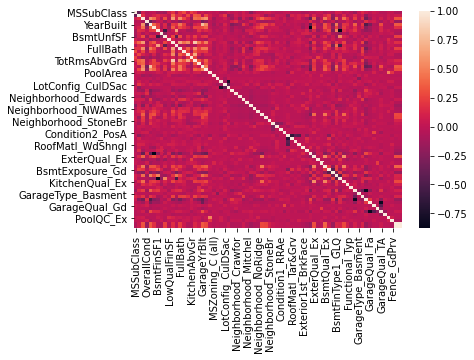

In [33]:
heatmap(X.corr())

# 2) Ridge Regression Model

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

w = []
q = 0.9
for i in range(0,20):
    q = q + 0.01
    w.append(q)
    
rr = Ridge()
tp = {"alpha":w}
cv = GridSearchCV(rr,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 1.1}

In [35]:
r_m = Ridge(alpha=1.1)
ridge_model = r_m.fit(xtrain,ytrain)

In [36]:
ridge_tr_err,ridge_ts_err = mam.regressor_accuracy(xtrain,ytrain,xtest,ytest,ridge_model)
print(f"Ridge Regression Model- \nTrainning Error: {ridge_tr_err}\nTesting Error: {ridge_ts_err}")

Ridge Regression Model- 
Trainning Error: 15369.25
Testing Error: 18948.9


# 3) Lasso Regression Model

In [37]:
from sklearn.linear_model import Lasso

w = []
q = 0.9
for i in range(0,20):
    q = q + 0.01
    w.append(q)
    
ls = Lasso()
tp = {"alpha":w}
cv = GridSearchCV(ls,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 1.1}

In [38]:
l_m = Lasso(alpha=1.1)
lasso_model = l_m.fit(xtrain,ytrain)

In [39]:
lasso_tr_err,lasso_ts_err = mam.regressor_accuracy(xtrain,ytrain,xtest,ytest,lasso_model)
print(f"Lasso Regression Model- \nTrainning Error: {lasso_tr_err}\nTesting Error: {lasso_ts_err}")

Lasso Regression Model- 
Trainning Error: 15344.39
Testing Error: 19163.14


# As comparing above therr models Ridge is best algorithm

# Trainning the Ridge model by all train data

In [40]:
fin_rr = Ridge(alpha=1.1)
fin_rr_model = fin_rr.fit(X,Y)

# Prepare test data as same testing data

In [41]:
B = pd.read_csv("E:/Data Science/Housing/testing_set.csv")

In [42]:
B.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [43]:
md3 = Missing_data()
md3.replacer(B)

In [44]:
B.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [45]:
test_data = B.drop(labels="Id",axis=1)

In [46]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,Inside,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Ex,MnPrv,Shed,700,7,2006,WD,Normal


In [47]:
cat, con = md3.catconsep(test_data)
test_data = md3.preprocessing(test_data)

In [48]:
test_data = test_data.drop(labels=["Exterior1st_WdShing","Electrical_SBrkr","HeatingQC_Ex","KitchenQual_Fa","Exterior2nd_MetalSd","LotFrontage","Exterior2nd_BrkFace","Functional_Maj2","Fence_MnWw","Exterior1st_VinylSd","BldgType_2fmCon","Electrical_FuseP","ExterCond_Ex","BsmtFinType2_Rec","ExterCond_Fa","RoofStyle_Mansard","Exterior2nd_HdBoard","Exterior2nd_VinylSd","MasVnrType_BrkCmn","Exterior2nd_CmentBd","BsmtFinType2_Unf","GarageArea","Foundation_PConc","TotalBsmtSF","Heating_GasA","Heating_GasW","FireplaceQu_Ex","Electrical_FuseA","2ndFlrSF","HouseStyle_2Story","HouseStyle_1Story","Exterior1st_MetalSd","MiscFeature_Gar2","BsmtFinType1_BLQ","SaleType_Con","Functional_Maj1","Heating_Wall","BsmtFinType2_BLQ","MasVnrType_BrkFace","SaleType_Oth","FireplaceQu_Gd","FireplaceQu_TA","Exterior2nd_CBlock","LotShape_Reg","PavedDrive_P","EnclosedPorch","Exterior2nd_AsbShng","Exterior1st_BrkComm","Exterior1st_AsbShng","Exterior2nd_Brk Cmn","HeatingQC_Fa","HouseStyle_1.5Fin","Neighborhood_Veenker","Neighborhood_SawyerW","SaleType_CWD","Neighborhood_SWISU","Foundation_BrkTil","Condition2_Norm","Street_Grvl","HouseStyle_SLvl","BsmtFinType1_Rec","BsmtFinType1_ALQ","Exterior1st_CBlock","ExterCond_Po","Exterior2nd_Wd Sdng","Electrical_FuseF","LandContour_Low","LotShape_IR2","Functional_Mod","1stFlrSF","Neighborhood_OldTown","Exterior1st_AsphShn","BsmtQual_Fa","Neighborhood_IDOTRR","Fence_MnPrv","MiscVal","ExterQual_TA","Condition1_RRNe","Condition1_RRNn","ExterQual_Gd","MiscFeature_Shed","Condition1_Artery","MiscFeature_Othr","Condition2_Artery","3SsnPorch","BsmtCond_TA","Fence_GdWo","HeatingQC_Po","LandContour_Bnk","GarageType_CarPort","SaleCondition_Family","GarageType_2Types","BsmtExposure_Mn","Exterior2nd_AsphShn","RoofStyle_Gambrel","GarageFinish_RFn","Alley_Grvl","RoofStyle_Gable","RoofStyle_Hip","ExterQual_Fa","BldgType_Twnhs","BldgType_TwnhsE","Exterior2nd_Stucco","Functional_Min1","OpenPorchSF","RoofStyle_Flat","LandContour_Lvl","LandContour_HLS","Heating_Grav","LotShape_IR3","LotConfig_FR3","LotConfig_FR2","LotShape_IR1","BsmtHalfBath","HouseStyle_SFoyer","BsmtExposure_Av","MoSold","Exterior1st_Plywood","Condition2_Feedr","CentralAir_Y","MSZoning_FV","MSZoning_RH","MSZoning_RL","Exterior1st_Stucco","MSZoning_RM","FireplaceQu_Po","SaleType_ConLI","SaleType_ConLD","Neighborhood_Blueste","Foundation_Wood","SaleType_ConLw","Neighborhood_Sawyer","Neighborhood_CollgCr","Condition2_PosN","Neighborhood_Timber","LandSlope_Gtl","LandSlope_Mod","CentralAir_N","Functional_Sev","ExterCond_TA","YrSold","Functional_Min2","BsmtQual_TA","BsmtFinType2_LwQ","Neighborhood_BrDale","BsmtCond_Fa","YearRemodAdd","BsmtQual_Gd","Neighborhood_ClearCr","KitchenQual_Gd","Exterior1st_CemntBd","KitchenQual_TA","GarageFinish_Fin","SaleCondition_Abnorml","Street_Pave","PavedDrive_Y","Condition1_PosA","PavedDrive_N","BldgType_1Fam","Neighborhood_MeadowV","Neighborhood_NPkVill","HouseStyle_2.5Unf","Alley_Pave","PoolQC_Gd","ExterCond_Gd","ScreenPorch","SaleCondition_Alloca","WoodDeckSF","HeatingQC_TA","SaleCondition_AdjLand","SaleCondition_Normal","Foundation_CBlock","BsmtFinType1_LwQ","Exterior1st_HdBoard","GarageCond_Po","SaleType_WD","SaleType_COD","GarageCond_Gd","GarageCond_Fa","GarageCond_TA","Exterior1st_Wd Sdng","BsmtFinType2_GLQ","BsmtFinType2_ALQ","GarageFinish_Unf","RoofStyle_Shed","HeatingQC_Gd","BldgType_Duplex","BsmtCond_Po","Exterior2nd_Wd Shng","Condition1_RRAn","Exterior2nd_Stone","HouseStyle_1.5Unf","Neighborhood_Blmngtn","BsmtCond_Gd","LandSlope_Sev","MasVnrType_Stone","Condition1_Feedr","Exterior2nd_ImStucc"],axis=1)

# Predicting the output

In [49]:
pred_data = fin_rr_model.predict(test_data)

In [50]:
fin_pred_td = []
for i in pred_data:
    fin_pred_td.append(round(i,2))

# Create Dataframe name as result columns(Id,Predicted_SalePrice)

In [51]:
result = pd.DataFrame(B["Id"])
result["SalePrice"] = fin_pred_td

In [52]:
result

,Id,SalePrice
0,1461,214366.99
1,1462,259753.63
2,1463,289469.11
3,1464,293919.04
4,1465,314065.95
...,...,...
1454,2915,197308.93
1455,2916,187951.53
1456,2917,278090.93
1457,2918,217789.90


# Making CSV file of result dataframe

In [53]:
result.to_csv("E:/Data Science/Housing/result.csv")